In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
in_state = pd.read_csv("C:EV Stats-1.csv")
in_state.drop("Sl. No", axis=1, inplace=True)
in_state.drop("Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules",axis=1,inplace=True)
in_state.drop("Two Wheelers (Category L2 (CMVR))",axis=1,inplace=True)
in_state.drop("Two Wheelers (Max power not exceeding 250 Watts)",axis=1,inplace=True)
in_state.drop("Three Wheelers (Category L5 slow speed as per CMVR)",axis=1,inplace=True)
in_state.drop("Three Wheelers (Category L5 as per CMVR)",axis=1,inplace=True)
in_state.drop("Passenger Cars (Category M1 as per CMVR)",axis=1,inplace=True)
in_state.drop("Buses",axis=1,inplace=True)
in_state=in_state.sort_values("Total in state",ascending=False)
print(in_state)

                        State  Total in state
14                Maharashtra           34013
6                     Gujarat           31267
24              Uttar Pradesh           26209
7                     Haryana           23589
4                       Delhi           19381
21                 Tamil Nadu           16746
20                  Rajasthan           15763
26                West Bengal           14140
11                  Karnataka           13386
12                     Kerala           11202
0              Andhra Pradesh            9492
22                  Telangana            9034
19                     Punjab            6538
13             Madhya Pradesh            6461
3                Chhattisgarh            4234
25                 Uttarkhand            4178
18                     Odisha            3863
2                       Bihar            3171
28                 Chandigarh            2500
1                       Assam            1875
10                  Jharkhand     

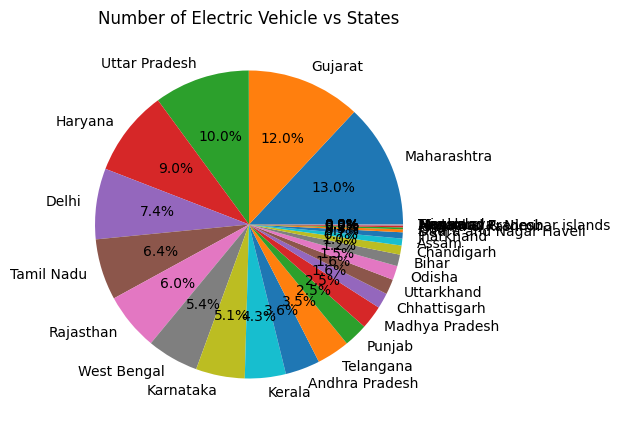

In [4]:
top5 = in_state[:30]
plt.figure(figsize=(5,5))
plt.title("Number of Electric Vehicle vs States")
plt.pie(top5["Total in state"], labels=top5["State"], autopct='%1.1f%%')
plt.show()

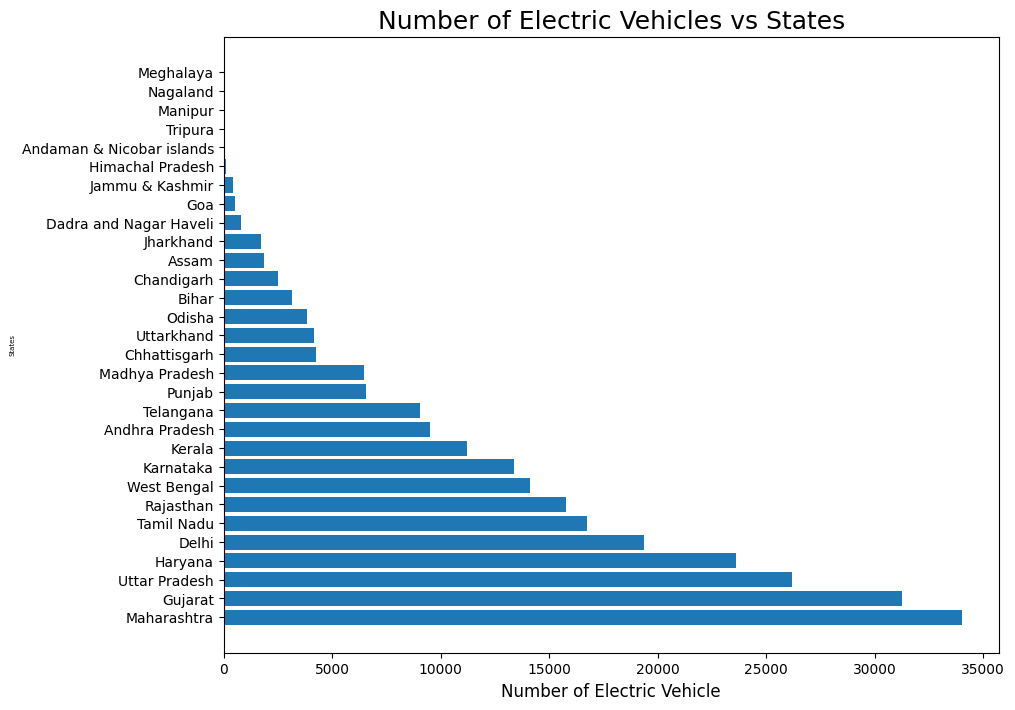

In [5]:

plt.figure(figsize=(10,8))
plt.barh(in_state["State"], in_state["Total in state"])
plt.title("Number of Electric Vehicles vs States", fontsize=18)
plt.xlabel("Number of Electric Vehicle", fontsize=12)
plt.ylabel("States", fontsize=5)
plt.xticks(rotation=0)
plt.show()

In [8]:
charge_points_in_state = pd.read_csv("C:EV Charge Points.csv")
charge_points_in_state.drop([len(charge_points_in_state)-1], axis=0, inplace=True)
charge_points_in_state = charge_points_in_state.sort_values(["Number of Electric Vehicle Charging Sanctioned"], ascending=False)
charge_points_in_state.head()

State/UT-wise  Number of Electric Vehicle Charging Sanctioned
0     Maharashtra                                             317
1  Andhra Pradesh                                             266
2      Tamil Nadu                                             256
3         Gujarat                                             228
4   Uttar Pradesh                                             207

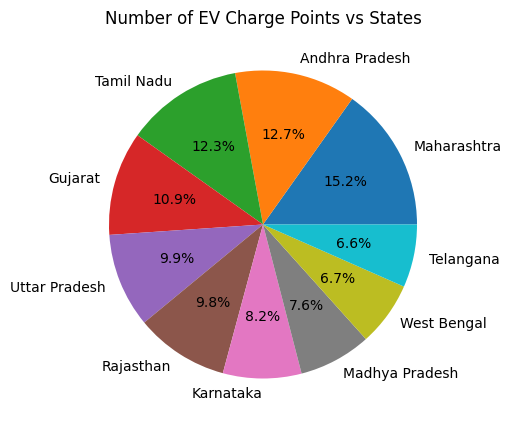

In [9]:
top10 = charge_points_in_state[:10]
plt.figure(figsize=(5,5))
plt.title("Number of EV Charge Points vs States")
plt.pie(top10["Number of Electric Vehicle Charging Sanctioned"], labels=top10["State/UT-wise"], autopct='%1.1f%%')
plt.show()

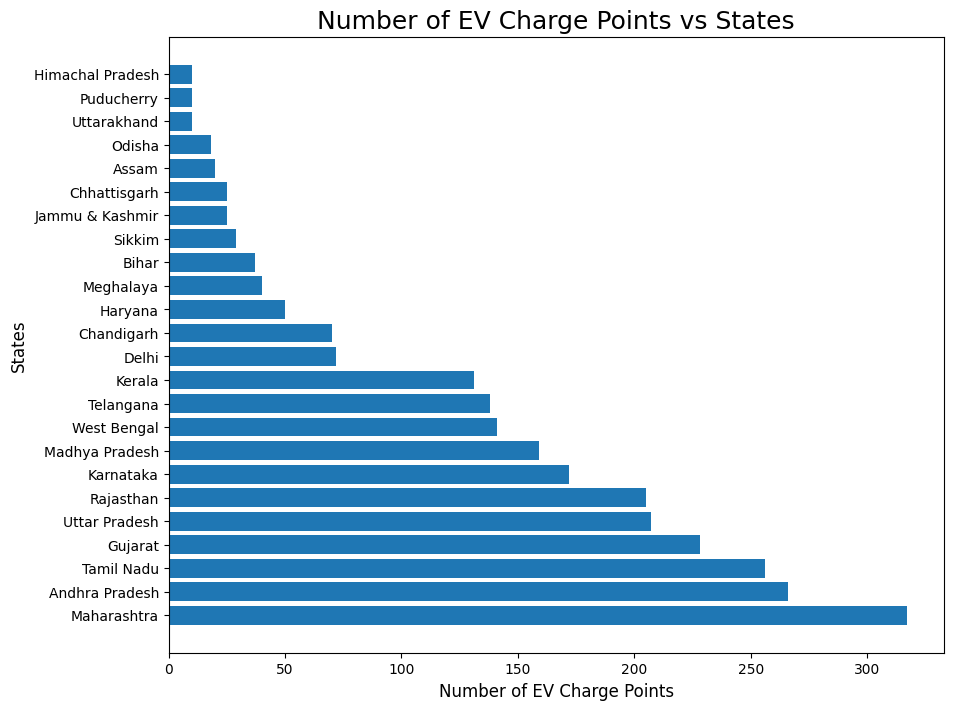

In [10]:
plt.figure(figsize=(10,8))
plt.barh(charge_points_in_state["State/UT-wise"], charge_points_in_state["Number of Electric Vehicle Charging Sanctioned"])
plt.title("Number of EV Charge Points vs States", fontsize=18)
plt.xlabel("Number of EV Charge Points", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [12]:
car_details = pd.read_csv("C:EV_Car_Modified.csv")
car_details.head()

Brand                          Model     Accel  TopSpeed   Range  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  270 km   
2    Polestar                               2   4.7 sec  210 km/h  400 km   
3         BMW                            iX3    6.8 sec  180 km/h  360 km   
4       Honda                              e    9.5 sec  145 km/h  170 km   

  Efficiency FastCharge              RapidCharge        PowerTrain  \
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive   
1  167 Wh/km   250 km/h  Rapid charging possible  Rear Wheel Drive   
2  181 Wh/km   620 km/h  Rapid charging possible   All Wheel Drive   
3  206 Wh/km   560 km/h  Rapid charging possible  Rear Wheel Drive   
4  168 Wh/km   190 km/h  Rapid charging possible  Rear Wheel Drive   

     PlugType  BodyStyle Segment  Seats    Price  
0  Type 2 CCS      Sedan       D      5  4400000  
1  Type 2 CCS  Hatchback       C      5  2400000  
2  Type 2 CCS   Liftback       D      5  4515200  
3  Type 2 CCS        SUV       D      5  5443200  
4  Type 2 CCS  Hatchback       B      4  2639760

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


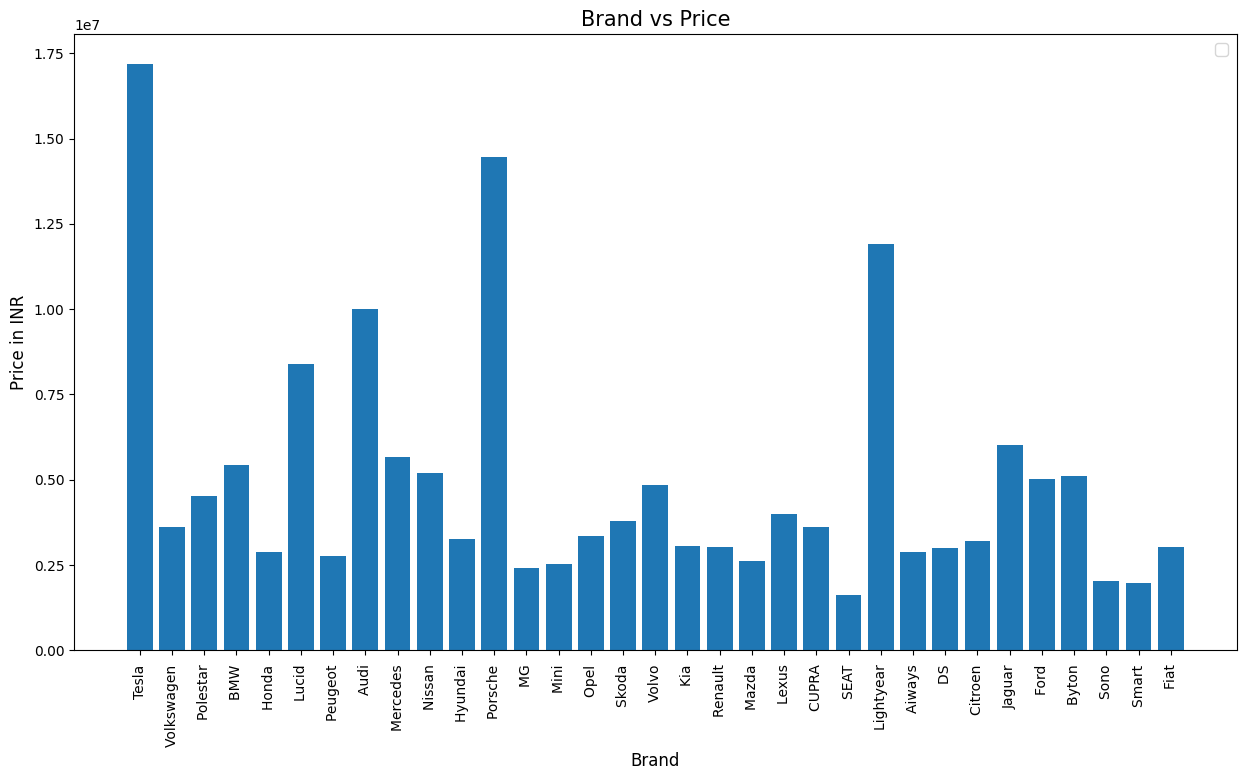

In [13]:
plt.figure(figsize=(15,8))
plt.bar(car_details.Brand, car_details.Price)
plt.xticks(rotation=90)
plt.title("Brand vs Price", fontsize=15)
plt.ylabel("Price in INR", fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.legend(fontsize=12)
plt.show()

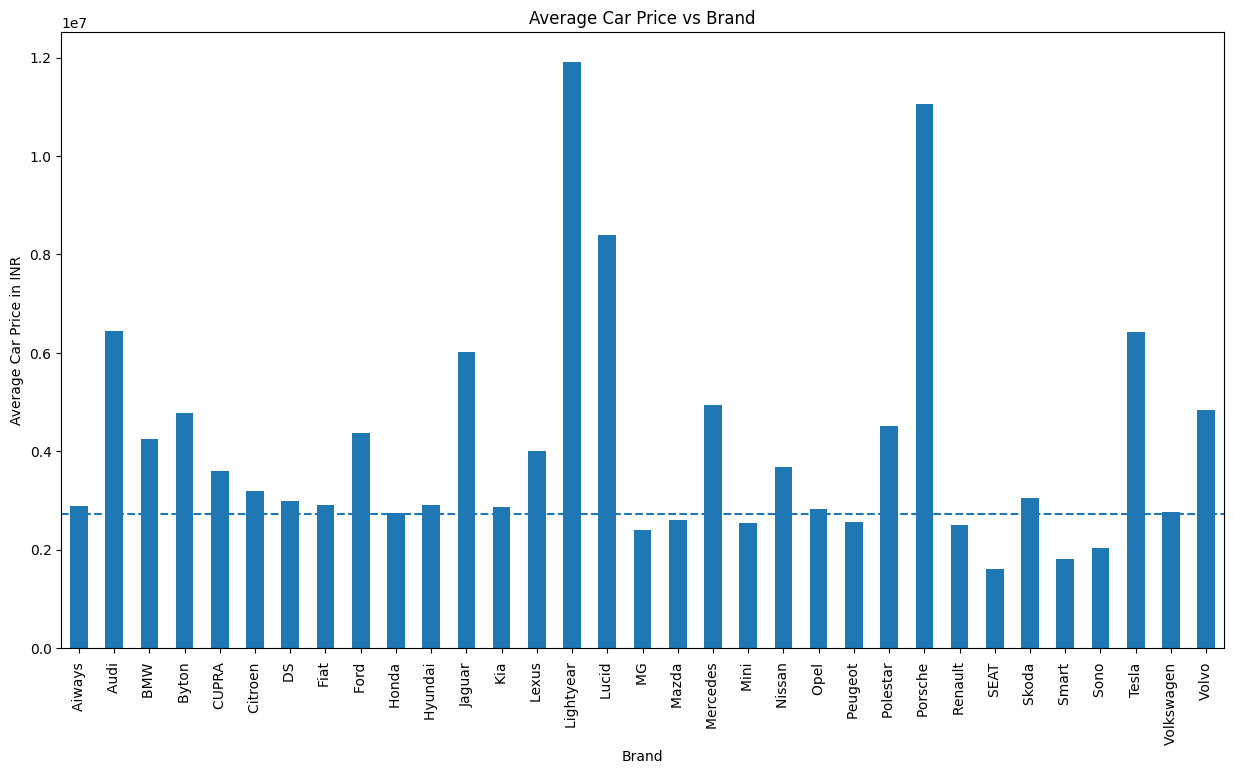

In [14]:
%matplotlib inline
y = car_details.groupby(["Brand"])["Price"].mean()
y.plot(kind="bar", figsize=(15,8))
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Car Price in INR")
plt.title("Average Car Price vs Brand")
plt.axhline(car_details.Price.std(), linestyle="--")
plt.show()

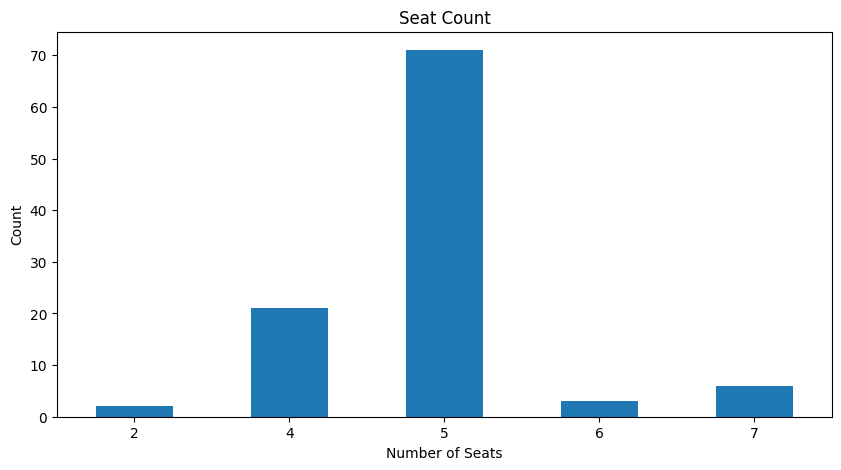

In [15]:
y = car_details.Seats.value_counts().sort_index(ascending=True)
y.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.title("Seat Count")
plt.show()

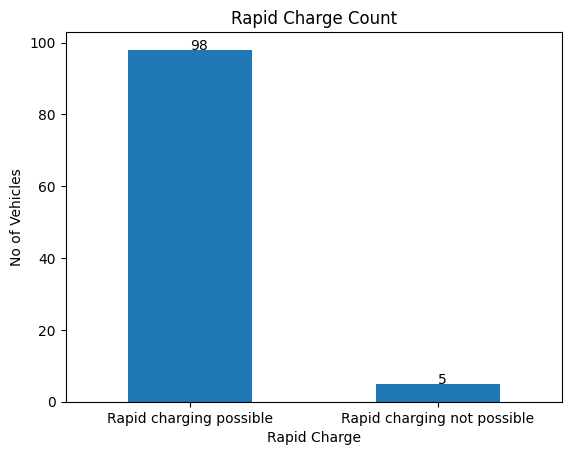

In [16]:
y = car_details.RapidCharge.value_counts()
car_details.RapidCharge.value_counts().plot(kind="bar")
plt.xticks(rotation=0)
for i in range(len(y)):
    plt.text(i,y[i],y[i])
plt.xlabel("Rapid Charge")
plt.ylabel("No of Vehicles")
plt.title("Rapid Charge Count")
plt.show()
     

In [17]:
for label, content in car_details.items():
    if not pd.api.types.is_numeric_dtype(car_details[label]):
        lst = car_details[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        car_details[label] = car_details[label].map(label_map)
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Brand        103 non-null    int64
 1   Model        103 non-null    int64
 2   Accel        103 non-null    int64
 3   TopSpeed     103 non-null    int64
 4   Range        103 non-null    int64
 5   Efficiency   103 non-null    int64
 6   FastCharge   103 non-null    int64
 7   RapidCharge  103 non-null    int64
 8   PowerTrain   103 non-null    int64
 9   PlugType     103 non-null    int64
 10  BodyStyle    103 non-null    int64
 11  Segment      103 non-null    int64
 12  Seats        103 non-null    int64
 13  Price        103 non-null    int64
dtypes: int64(14)
memory usage: 11.4 KB


<Axes: >

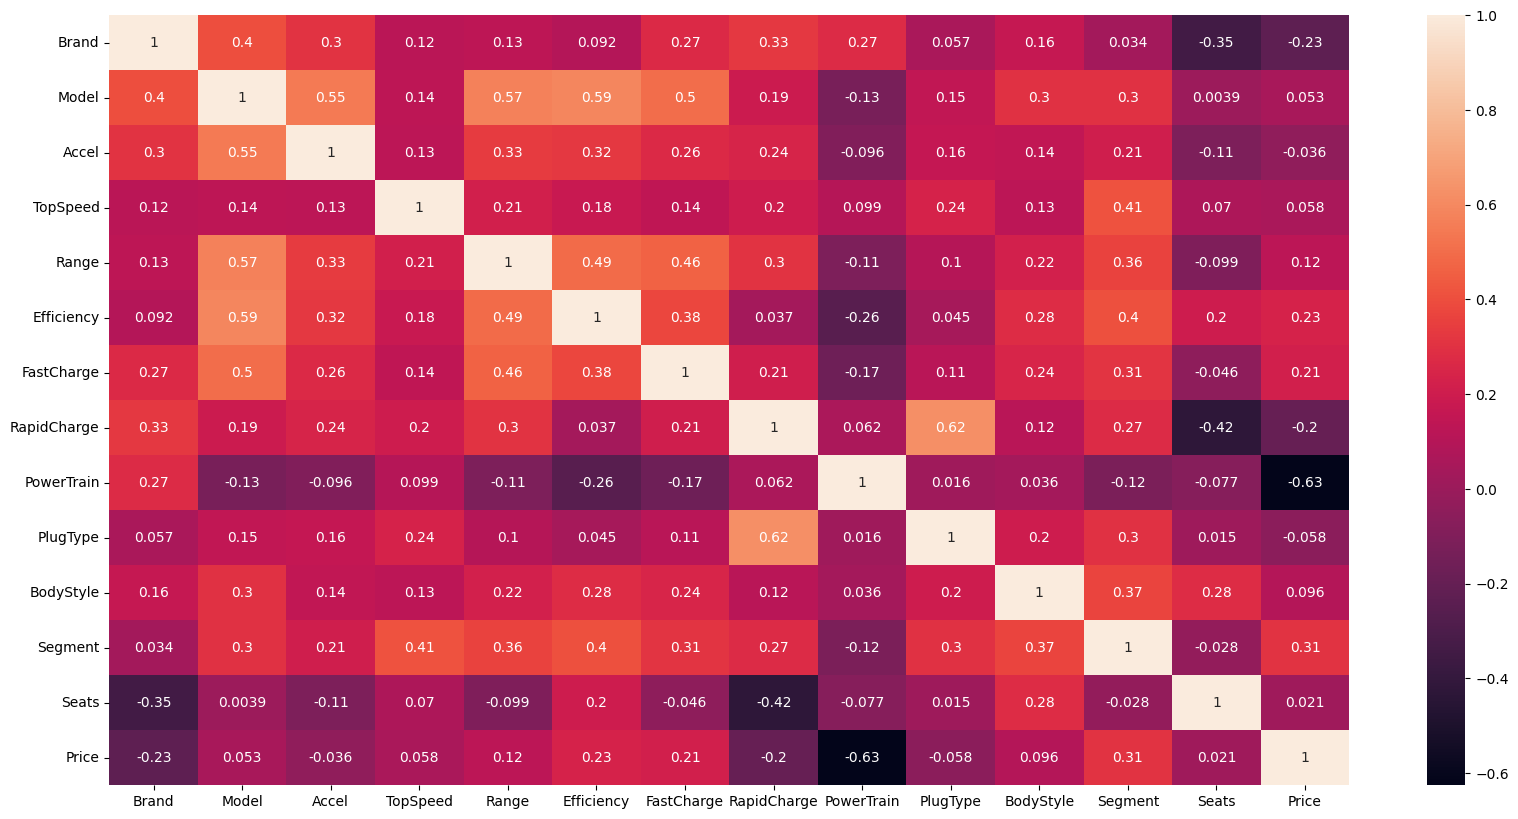

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(car_details.corr(), annot=True)

In [20]:

car_data_modified = pd.read_csv("C:EV_Car_Modified.csv")
car_data_modified.head()
     

Brand                          Model     Accel  TopSpeed   Range  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  270 km   
2    Polestar                               2   4.7 sec  210 km/h  400 km   
3         BMW                            iX3    6.8 sec  180 km/h  360 km   
4       Honda                              e    9.5 sec  145 km/h  170 km   

  Efficiency FastCharge              RapidCharge        PowerTrain  \
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive   
1  167 Wh/km   250 km/h  Rapid charging possible  Rear Wheel Drive   
2  181 Wh/km   620 km/h  Rapid charging possible   All Wheel Drive   
3  206 Wh/km   560 km/h  Rapid charging possible  Rear Wheel Drive   
4  168 Wh/km   190 km/h  Rapid charging possible  Rear Wheel Drive   

     PlugType  BodyStyle Segment  Seats    Price  
0  Type 2 CCS      Sedan       D      5  4400000  
1  Type 2 CCS  Hatchback       C      5  2400000  
2  Type 2 CCS   Liftback       D      5  4515200  
3  Type 2 CCS        SUV       D      5  5443200  
4  Type 2 CCS  Hatchback       B      4  2639760

In [21]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
     

C:\Users\npava\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\npava\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\npava\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\npava\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

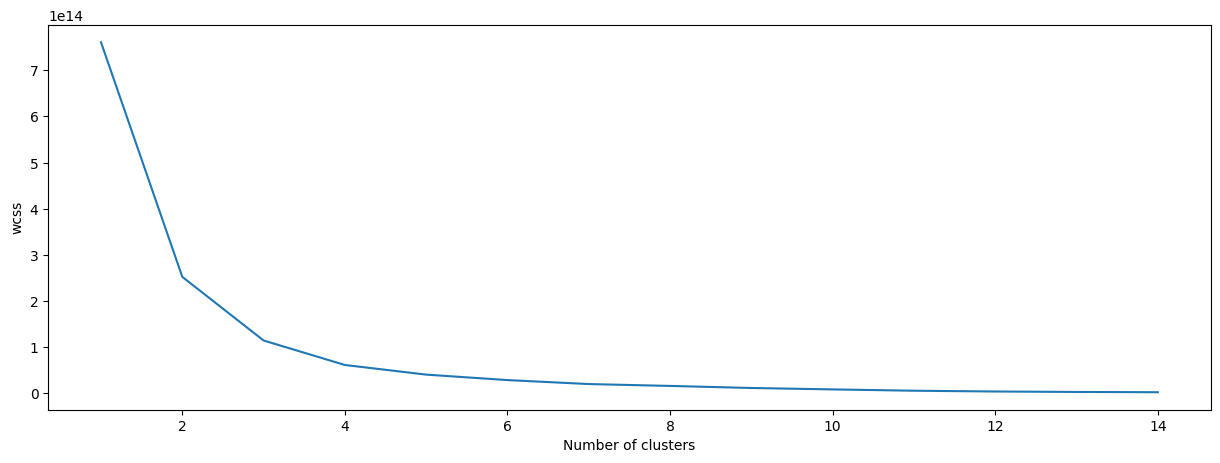

In [22]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(car_details)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
kmeans = KMeans(4, init = 'k-means++', random_state=42).fit(car_details)
car_details['cluster_number'] = kmeans.labels_

C:\Users\npava\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


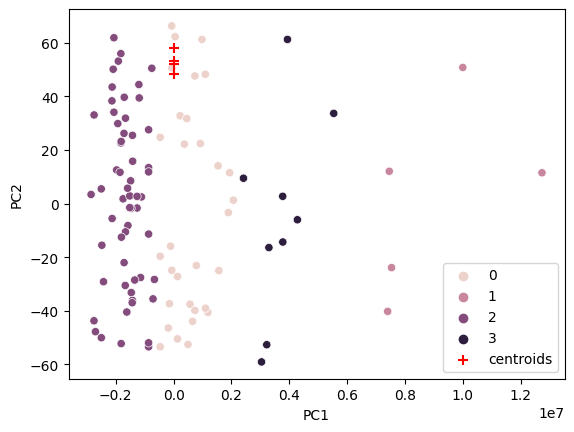

In [32]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = car_details.values
pca = preprocessing.scale(x)
pca = PCA(n_components=13)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(13)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()

From the above analysis the people in the states with high GDP are most likely to go with EVs.
Most of the vehicles sold are the passenger vehicle rather than commercial vehicles
The EV sales depend mostly on number of charging stations
The market is more open towards the compact cars and bit towards larger ones